Lab | Random Forests
For this lab, you will be using the CSV files provided in the files_for_lab folder. These are cleaned versions of the learningSet data from the Case Study 'Healthcare for All'.

Instructions
Apply the Random Forests algorithm but this time only by upscaling the data.
Use Feature Selections that you have learned in class to decide if you want to use all of the features (PCA, etc)
Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative?
How would you change your algorithm or data in order to maximize the return of the bussiness?

# Import data

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
target = pd.read_csv('target.csv')

In [3]:
data = pd.concat([numerical, categorical, target], axis = 1)
data.shape

(95412, 339)

In [4]:
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [5]:
data.isna().sum().sum()

0

In [6]:
y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis = 1)

In [7]:
numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

/var/folders/rj/ty5_khc929v572g5r_tjk0sw0000gn/T/ipykernel_75325/2358487290.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricalX = X.select_dtypes(np.object)


# X-y split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [9]:
X_train_num = X_train.select_dtypes(np.number)
X_train_cat= X_train.select_dtypes(np.object)

X_test_num = X_test.select_dtypes(np.number)
X_test_cat= X_test.select_dtypes(np.object)

/var/folders/rj/ty5_khc929v572g5r_tjk0sw0000gn/T/ipykernel_75325/1907165586.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train_cat= X_train.select_dtypes(np.object)
/var/folders/rj/ty5_khc929v572g5r_tjk0sw0000gn/T/ipykernel_75325/1907165586.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_test_cat= X_test.select_dtypes(np.object)


# One-hot encoding

In [10]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded)


X_train_cat_encoded = X_train_cat_encoded.reset_index(drop=True)
X_train_num = X_train_num.reset_index(drop=True)


X_test_cat_encoded = encoder.transform(X_test_cat).toarray()
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded)

X_test_cat_encoded = X_test_cat_encoded.reset_index(drop=True)
X_test_num = X_test_num.reset_index(drop=True)


In [11]:
X_train_cat_encoded.shape

(76329, 24)

In [12]:
display(X_train_num)
X_test_num

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_D
0,1,75.000000,4,6,2,0,31,10,68,6,...,1,89,2,90,12,96,1,88,3,0.0
1,0,53.000000,5,9,0,0,29,24,38,7,...,1,96,2,96,2,96,2,96,2,0.0
2,1,60.000000,5,1,5,0,42,16,62,10,...,9,91,10,95,11,95,11,88,9,5.0
3,1,77.000000,6,6,9,1,40,23,41,8,...,1,88,11,93,9,95,12,88,11,0.0
4,3,55.000000,5,2,21,33,27,29,18,12,...,1,94,1,95,4,95,4,94,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76324,0,70.000000,3,9,5,2,37,10,32,26,...,8,95,12,94,10,97,2,86,12,0.0
76325,2,66.000000,3,6,0,0,36,11,62,4,...,1,96,2,96,2,96,2,96,2,0.0
76326,1,61.611649,5,9,0,0,35,29,42,17,...,2,87,1,94,12,96,1,87,1,8.0
76327,1,76.000000,5,3,1,0,59,22,31,3,...,7,87,11,95,12,96,3,86,9,0.0


,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_D
0,28,65.000000,6,9,0,0,24,42,22,9,...,8,91,10,95,11,95,11,91,9,0.0
1,1,58.000000,5,9,0,0,17,28,42,10,...,5,90,8,95,1,95,4,87,4,0.0
2,1,46.000000,7,8,1,0,28,44,22,2,...,3,91,10,95,10,95,10,91,10,0.0
3,0,61.611649,5,9,0,0,33,37,49,8,...,2,91,2,89,2,96,2,86,11,0.0
4,0,46.000000,3,2,0,49,16,32,3,9,...,1,96,2,96,2,96,2,96,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,2,61.611649,2,0,0,0,31,26,31,6,...,2,93,11,95,11,96,2,93,2,0.0
19079,0,68.000000,5,2,18,0,30,23,31,7,...,6,90,11,96,1,96,1,90,11,0.0
19080,0,50.000000,5,9,0,0,22,12,38,8,...,1,95,10,95,10,95,10,95,10,0.0
19081,0,61.611649,2,2,0,0,33,26,41,12,...,2,89,5,94,11,95,5,86,7,0.0


In [13]:
X_train = pd.concat([X_train_num, X_train_cat_encoded], axis = 1)

In [14]:
X_test = pd.concat([X_test_num, X_test_cat_encoded], axis = 1)

In [15]:
X_train

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,14,15,16,17,18,19,20,21,22,23
0,1,75.000000,4,6,2,0,31,10,68,6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,53.000000,5,9,0,0,29,24,38,7,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,60.000000,5,1,5,0,42,16,62,10,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,77.000000,6,6,9,1,40,23,41,8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,55.000000,5,2,21,33,27,29,18,12,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76324,0,70.000000,3,9,5,2,37,10,32,26,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
76325,2,66.000000,3,6,0,0,36,11,62,4,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
76326,1,61.611649,5,9,0,0,35,29,42,17,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
76327,1,76.000000,5,3,1,0,59,22,31,3,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [16]:
X_test

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,14,15,16,17,18,19,20,21,22,23
0,28,65.000000,6,9,0,0,24,42,22,9,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,58.000000,5,9,0,0,17,28,42,10,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,46.000000,7,8,1,0,28,44,22,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,61.611649,5,9,0,0,33,37,49,8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,46.000000,3,2,0,49,16,32,3,9,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,2,61.611649,2,0,0,0,31,26,31,6,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
19079,0,68.000000,5,2,18,0,30,23,31,7,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19080,0,50.000000,5,9,0,0,22,12,38,8,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
19081,0,61.611649,2,2,0,0,33,26,41,12,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Feature selection - PCA

In [18]:
from sklearn.preprocessing import MinMaxScaler
def MinMax_Scaling_func(data, MinMaxtransformer):
    X_normalized = MinMaxtransformer.transform(data)
    print(X_normalized.shape)
    X_normalized = pd.DataFrame(X_normalized,columns=data.columns)
    return X_normalized

In [19]:
MinMaxtransformer = MinMaxScaler().fit(X_train_num)

In [20]:
X_train_num_scaled = MinMax_Scaling_func(X_train_num, MinMaxtransformer)
X_test_num_scaled = MinMax_Scaling_func(X_test_num, MinMaxtransformer)

(76329, 331)
(19083, 331)


In [21]:
# applying pca
from sklearn.decomposition import PCA

In [22]:
pca = PCA()
pca.fit(X_train_num_scaled)

PCA()

In [23]:
pca.explained_variance_ratio_.round(2)

array([0.19, 0.11, 0.07, 0.05, 0.04, 0.04, 0.03, 0.03, 0.03, 0.03, 0.02,
       0.02, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

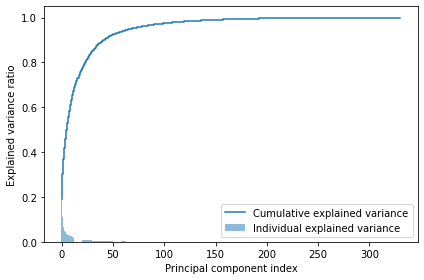

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#cum_sum_eigenvalues

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [25]:
pca.explained_variance_ratio_[:43].sum()

0.9023101416835055

In [26]:
#Choose the number of dimensions

In [27]:
pca = PCA(43)
pca.fit(X_train_num_scaled)

PCA(n_components=43)

In [28]:
pca.explained_variance_ratio_.sum()

0.902252609931015

In [29]:
#  Apply PCA on train and test data

In [30]:
X_train_pca = pca.transform(X_train_num_scaled)
X_test_pca = pca.transform(X_test_num_scaled)

In [31]:
X_train_pca.shape

(76329, 43)

In [32]:

# PCA: correlation between original variables and variables after applying PCA


Text(0.5, 1.0, 'Correlation of PC scores')

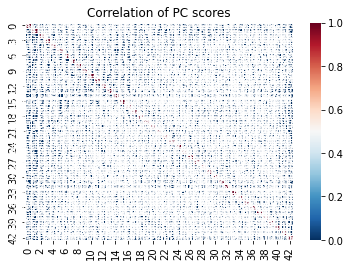

In [33]:
import seaborn as sb

X_train_pca = pca.transform(X_train_num_scaled)
corr_pc = pd.DataFrame(X_train_pca).corr()
sb.heatmap(corr_pc, 
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.title('Correlation of PC scores')

In [34]:
# concat all the data for the model 

In [35]:
# X_train_pca = pd.concat([pd.DataFrame(X_train_pca), X_train_cat_encoded], axis=1)
# X_test_pca = pd.concat([pd.DataFrame(X_test_pca), X_test_cat_encoded], axis=1)

X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)

In [36]:
X_train_pca.reset_index(drop=True, inplace=True)
X_test_pca.reset_index(drop=True, inplace=True)

In [37]:
X_train= pd.concat([X_train_pca, X_train_cat_encoded], axis = 1)

X_test= pd.concat([X_test_pca, X_test_cat_encoded], axis = 1)

In [38]:
#  Random Forest

In [39]:
X_train.shape, X_test.shape

((76329, 67), (19083, 67))

# Upscaling the target

In [40]:
# # quicker way to upscale category 1:
from sklearn.utils import resample

In [41]:
y_test = y_test.reset_index(drop=True)

In [42]:
# for upsampling we need to temporarily concat X_train and y_train
y_train = y_train.reset_index(drop=True)

train = pd.concat([X_train, y_train],axis=1)

In [44]:
train

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,TARGET_B
0,-0.191245,0.388369,-0.614840,-0.454519,0.643731,0.470453,-0.122575,-0.205375,0.351505,-0.335256,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-1.666363,-0.240483,-0.122859,0.286083,-0.693259,0.955253,0.104792,-0.451799,-0.137117,0.070466,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
2,-0.327862,0.644168,1.089906,-0.459073,1.397501,-0.876011,0.107970,-0.340372,1.034084,0.361155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1.517049,-0.051505,-1.278353,0.563133,0.073525,-0.895422,-0.492257,0.298028,0.513712,0.250897,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.035035,0.407597,0.470557,-1.425919,0.123620,0.583938,-0.086779,0.326468,-0.212814,-0.063443,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76324,1.002645,-0.491870,-0.987610,-0.252695,0.879687,0.039296,0.477294,0.077726,0.309126,0.090248,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
76325,-0.462868,-1.048195,0.517650,0.462405,0.789473,1.005375,-0.150238,0.433402,-0.348214,-0.710169,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
76326,-1.196250,0.110443,-0.050926,0.154421,-0.124053,0.485007,-0.253725,-0.875417,-0.478335,0.616629,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
76327,-1.459249,-0.901111,0.711483,0.010675,0.692915,-0.242623,0.076330,0.655397,0.796266,-0.007690,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0


In [45]:
not_donate = train[train['TARGET_B']==0]
donate = train[train['TARGET_B']==1]

display(not_donate.shape)
display(donate.shape)

(72486, 68)

(3843, 68)

In [46]:
# oversample minority
donate_oversampled = resample(donate, #<- sample from here
                                replace=True, #<- we need replacement, since we don't have enough data otherwise
                                n_samples = len(not_donate))#<- make both sets the same size

In [47]:
display(not_donate.shape)
display(donate_oversampled.shape)
donate_oversampled.head(10)

(72486, 68)

(72486, 68)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,TARGET_B
68306,-0.140939,0.079097,-1.010831,-0.242987,0.368799,1.128463,0.126224,-0.140238,0.170310,-0.140593,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
5054,0.772615,-0.598821,0.519254,-1.232391,-0.487832,-0.294571,0.845398,-0.259255,0.051058,-0.040594,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1622,1.849844,0.370673,0.637080,-0.043734,-0.567854,-0.727441,-0.483707,-0.094171,-0.011827,0.164269,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
62108,-0.866559,-0.538929,0.613631,0.310418,1.637516,0.056798,0.605183,-0.290322,0.490272,0.141887,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
49537,0.003093,-0.696655,-0.309839,-0.566316,0.692319,-0.119899,0.441949,0.218955,-0.910121,0.379894,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
20290,0.078356,-1.862533,0.628091,0.658284,-0.322744,0.235221,0.229080,0.075667,-0.511245,-0.914355,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
22855,-1.505580,-1.116071,0.006614,0.483903,-0.585563,0.346364,-0.397796,-0.273141,0.460161,-0.522460,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
23549,1.969699,-1.289021,-0.429070,0.438758,0.539524,-0.008650,0.405129,0.673029,-0.249445,0.223775,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
29910,-1.079393,-0.063808,-0.052650,0.226668,-0.294561,-0.377085,0.024488,-0.699697,-0.668415,0.214954,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
41683,-1.046479,1.422264,0.028486,0.211157,0.460369,0.797771,-0.457584,0.062493,-1.070376,0.128890,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


In [52]:
not_donate = not_donate.reset_index(drop=True, inplace=True)
donate_oversampled = donate_oversampled.reset_index(drop=True, inplace=True)

In [53]:
train_oversampled = pd.concat([not_donate,donate_oversampled],axis=0)
train_oversampled.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,TARGET_B
0,-0.191245,0.388369,-0.614840,-0.454519,0.643731,0.470453,-0.122575,-0.205375,0.351505,-0.335256,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-1.666363,-0.240483,-0.122859,0.286083,-0.693259,0.955253,0.104792,-0.451799,-0.137117,0.070466,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
2,1.517049,-0.051505,-1.278353,0.563133,0.073525,-0.895422,-0.492257,0.298028,0.513712,0.250897,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0.035035,0.407597,0.470557,-1.425919,0.123620,0.583938,-0.086779,0.326468,-0.212814,-0.063443,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-0.919675,0.372147,-1.276004,0.192990,0.604596,-0.771131,-0.383249,-0.535808,-0.246280,0.571222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [54]:
y_train_over = train_oversampled['TARGET_B']
X_train_over = train_oversampled.drop('TARGET_B',axis = 1)

In [55]:
X_train_over

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.191245,0.388369,-0.614840,-0.454519,0.643731,0.470453,-0.122575,-0.205375,0.351505,-0.335256,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.666363,-0.240483,-0.122859,0.286083,-0.693259,0.955253,0.104792,-0.451799,-0.137117,0.070466,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.517049,-0.051505,-1.278353,0.563133,0.073525,-0.895422,-0.492257,0.298028,0.513712,0.250897,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.035035,0.407597,0.470557,-1.425919,0.123620,0.583938,-0.086779,0.326468,-0.212814,-0.063443,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.919675,0.372147,-1.276004,0.192990,0.604596,-0.771131,-0.383249,-0.535808,-0.246280,0.571222,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72481,-1.199232,-0.805312,0.751747,0.592441,-0.259541,0.036568,-0.024729,-0.408742,-0.069024,-0.468188,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
72482,-0.960075,-0.170574,-0.426053,-0.035098,-0.110969,-0.325320,-0.101912,-0.729672,-0.243569,0.232977,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
72483,1.224270,-0.751568,0.037574,-0.770464,-0.626062,-0.649842,0.457537,0.000449,0.328740,0.828400,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72484,-1.828338,-0.002797,-0.494677,0.524940,-0.217438,-0.556930,-0.270668,-0.786319,-0.019220,0.087590,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [51]:
X_train_over.isna().sum().sum()

0

# Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)
clf.fit(X_train_over, y_train_over)
print(clf.score(X_train_over, y_train_over))
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.6254794029191844
0.6404129329769952


0    18083
1     1000
Name: TARGET_B, dtype: int64

array([[11731,  6352],
       [  510,   490]])

Lab | Final regression model in "Health Care for All" Case
Instructions
At this point, we have created a model to predict who will make a donation and who won't. But, what about the ammount of money that each person will give? In this lab, subset those that made a donation and use that subset to create a model to predict how much money will they give.

Evaluate the result of your model and estimate how much better the result are for the bussiness in comparison with the naive scenario we discuss on Monday.